# Banka Müşterilerinin Mevduata Abone Olmasının Tahmin Edilmesi

## Değişkenler:

* age= Yaş
* jop= iş türü
* martial= medeni durum
* education= eğitim seviyesi
* defualt= temmerüte düşen kredisi var mı?
* housing= konut kredisi var mı?
* loan= kişisel kredisi var mı?
* contact= iletişim türü
* month= iletişime geçilen en son ay
* day_of_week= iletişime geçilen en son haftanın gunu
* duration: iletişim süresi. y bağımsız değişkeniyle ilişkilidir!
* campaign= bu kampanya sırasında ve bu müşteri için gerçekleştirilen iletişim sayısı
* pdays= önceki bir kampanyadan müşteriyle en son iletişim kurulduktan sonra geçen gün sayısı
* previous= bu kampanyadan önce ve bu müşteri için gerçekleştirilen iletişim sayısı
* poutcome= önceki pazarlama kampanyasının sonucu
* emp.var.rate= istihdam değişim oranı (3 aylık gösterge)
* cons.price.idx= Tüketici fiyat indeksi
* cons.conf.idx= Tüketici güven endeksi
* euribor3m= euribor 3 aylık oran
* nr.employed= çalışan sayısı
* y = Müşteri vadeli mevduata abone oldu mu?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/okand/Desktop/projeler2/Bank Customer/bank-additional/bank-additional-full.csv",sep=";")
veri=data.copy()
veri

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
## Eksik gözlem
print(veri.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# 3 aylık olarak olarak alınan ve veri gözlemlerinde tekrar eden değerlerin tekil yapılarına göz atalım:
print(veri["emp.var.rate"].unique())
print(veri["cons.price.idx"].unique())
print(veri["cons.conf.idx"].unique())
print(veri["euribor3m"].unique())
print(veri["nr.employed"].unique())
print(veri["pdays"].unique())
print(veri["previous"].unique())
print(veri["job"].unique())

[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.3

In [6]:
# Bu değişkenleri kategorik değişken olarak tanımlayalım:
veri[["emp.var.rate","cons.price.idx","cons.conf.idx","nr.employed","pdays","previous","euribor3m"]]=veri[["emp.var.rate","cons.price.idx","cons.conf.idx","nr.employed","pdays","previous","euribor3m"]].astype(object)

In [7]:
veri.shape

(41188, 21)

In [8]:
veri=veri.drop_duplicates()
veri.shape

(41176, 21)

In [9]:
veri=veri.reset_index().drop(columns=["index"])
veri.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
veri.nunique(axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## Ki kare uyum testi:

Kategorik değişkenler veri setinde istatiksel olarak anlamlı dağılmışmı test edelim:

In [11]:
from scipy import stats

In [12]:
pd.value_counts(veri["job"]).sum()

41176

In [13]:
1/len(veri["job"].unique())

0.08333333333333333

In [14]:
kk=[]
pv=[]
bd=[]
for i in veri.select_dtypes(include=["object"]).columns:
    frekans=pd.value_counts(veri[i])
    kikare,p=stats.chisquare(frekans)
    kk.append(kikare)
    pv.append(p)



* H0: sonuçların olasılıkları eşit olması
* H1: sonuçların olasılıkları eşit değil

In [15]:
sonuc=pd.DataFrame({"Öznitelikler":veri.select_dtypes(include=["object"]).columns,"Kikare":kk,"P değeri":p})
sonuc

,Öznitelikler,Kikare,P değeri
0,job,38673.886730,0.0
1,marital,34212.581504,0.0
2,education,22574.057509,0.0
3,default,41528.887847,0.0
4,housing,18043.426316,0.0
5,loan,45656.532155,0.0
6,contact,2989.043035,0.0
7,month,39514.533320,0.0
8,day_of_week,51.377113,0.0
9,pdays,990533.665922,0.0


Tüm kategorik değişken için h0 hipotezi red edilir. 

# Ki Kare Testi ile Öznitelik seçimi

Ki-kare testini kullanarak, kategorik özellik ile hedef değişken arasında ilişkiyi ölçtükten sonra en iyi öznitelikleri seçelim:

In [16]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [17]:
veri_kategorik=veri.select_dtypes(include=["object"])

le=LabelEncoder()

for i in veri_kategorik.columns:
    veri_kategorik[i]=le.fit_transform(veri_kategorik[i])

veri_kategorik.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,1,0,0,0,0,1,6,1,26,0,1,8,18,16,287,8,0
1,7,1,3,1,0,0,1,6,1,26,0,1,8,18,16,287,8,0
2,7,1,3,0,2,0,1,6,1,26,0,1,8,18,16,287,8,0
3,0,1,1,0,0,0,1,6,1,26,0,1,8,18,16,287,8,0
4,7,1,3,0,0,2,1,6,1,26,0,1,8,18,16,287,8,0


In [18]:
X_k=veri_kategorik.drop(columns="y",axis=1)
y_k=veri_kategorik["y"]

In [19]:
X_k.shape # 17 kategorik değişken var:

(41176, 17)

In [20]:
chi_scores=chi2(X_k,y_k)
chi_scores

(array([9.10606856e+01, 2.78444777e+01, 1.67446537e+02, 3.21891101e+02,
        5.03001538e+00, 1.59481628e+00, 5.47778461e+02, 1.91780661e+00,
        1.02336274e+01, 2.46716960e+03, 3.08971421e+03, 9.82633299e+01,
        4.02371658e+03, 1.77026050e+03, 6.95569048e+02, 1.02950756e+05,
        3.98844635e+03]),
 array([1.39332695e-021, 1.31468774e-007, 2.67234520e-038, 5.61024919e-072,
        2.49116773e-002, 2.06639369e-001, 3.83060036e-121, 1.66098660e-001,
        1.37903192e-003, 0.00000000e+000, 0.00000000e+000, 3.66286433e-023,
        0.00000000e+000, 0.00000000e+000, 2.74946393e-153, 0.00000000e+000,
        0.00000000e+000]))

Burada ilk dizi ki kare değerlerini, ikinci dizi p-value değerlerini temsil eder.

<AxesSubplot:>

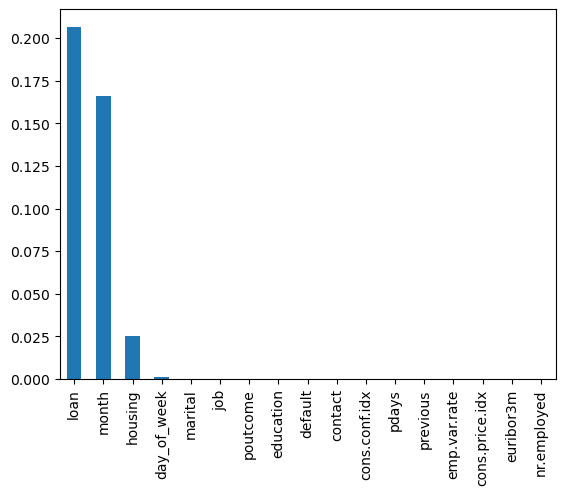

In [21]:
p_values = pd.Series(chi_scores[1],index = X_k.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


Loan ve month özniteliklerinin p değerleri 0.05'den büyük olduğu için bu değişkenler bağımlı değişkenden bağımsızdır. Bu öznitelikleri çıkartabiliriz.

In [22]:
X_k=X_k.drop(columns=["loan","month"],axis=1)
X_k.head()

,job,marital,education,default,housing,contact,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,1,1,26,0,1,8,18,16,287,8
1,7,1,3,1,0,1,1,26,0,1,8,18,16,287,8
2,7,1,3,0,2,1,1,26,0,1,8,18,16,287,8
3,0,1,1,0,0,1,1,26,0,1,8,18,16,287,8
4,7,1,3,0,0,1,1,26,0,1,8,18,16,287,8


In [23]:
veri2=pd.concat([X_k,veri.select_dtypes(include=["float","int"])],axis=1)
veri2["y"]=veri["y"]
veri2.head()

,job,marital,education,default,housing,contact,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,duration,campaign,y
0,3,1,0,0,0,1,1,26,0,1,8,18,16,287,8,56,261,1,no
1,7,1,3,1,0,1,1,26,0,1,8,18,16,287,8,57,149,1,no
2,7,1,3,0,2,1,1,26,0,1,8,18,16,287,8,37,226,1,no
3,0,1,1,0,0,1,1,26,0,1,8,18,16,287,8,40,151,1,no
4,7,1,3,0,0,1,1,26,0,1,8,18,16,287,8,56,307,1,no


## Aykırı Değer Analizi:

In [24]:
veri2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job             41176 non-null  int32 
 1   marital         41176 non-null  int32 
 2   education       41176 non-null  int32 
 3   default         41176 non-null  int32 
 4   housing         41176 non-null  int32 
 5   contact         41176 non-null  int32 
 6   day_of_week     41176 non-null  int32 
 7   pdays           41176 non-null  int32 
 8   previous        41176 non-null  int32 
 9   poutcome        41176 non-null  int32 
 10  emp.var.rate    41176 non-null  int32 
 11  cons.price.idx  41176 non-null  int32 
 12  cons.conf.idx   41176 non-null  int32 
 13  euribor3m       41176 non-null  int32 
 14  nr.employed     41176 non-null  int32 
 15  age             41176 non-null  int64 
 16  duration        41176 non-null  int64 
 17  campaign        41176 non-null  int64 
 18  y     

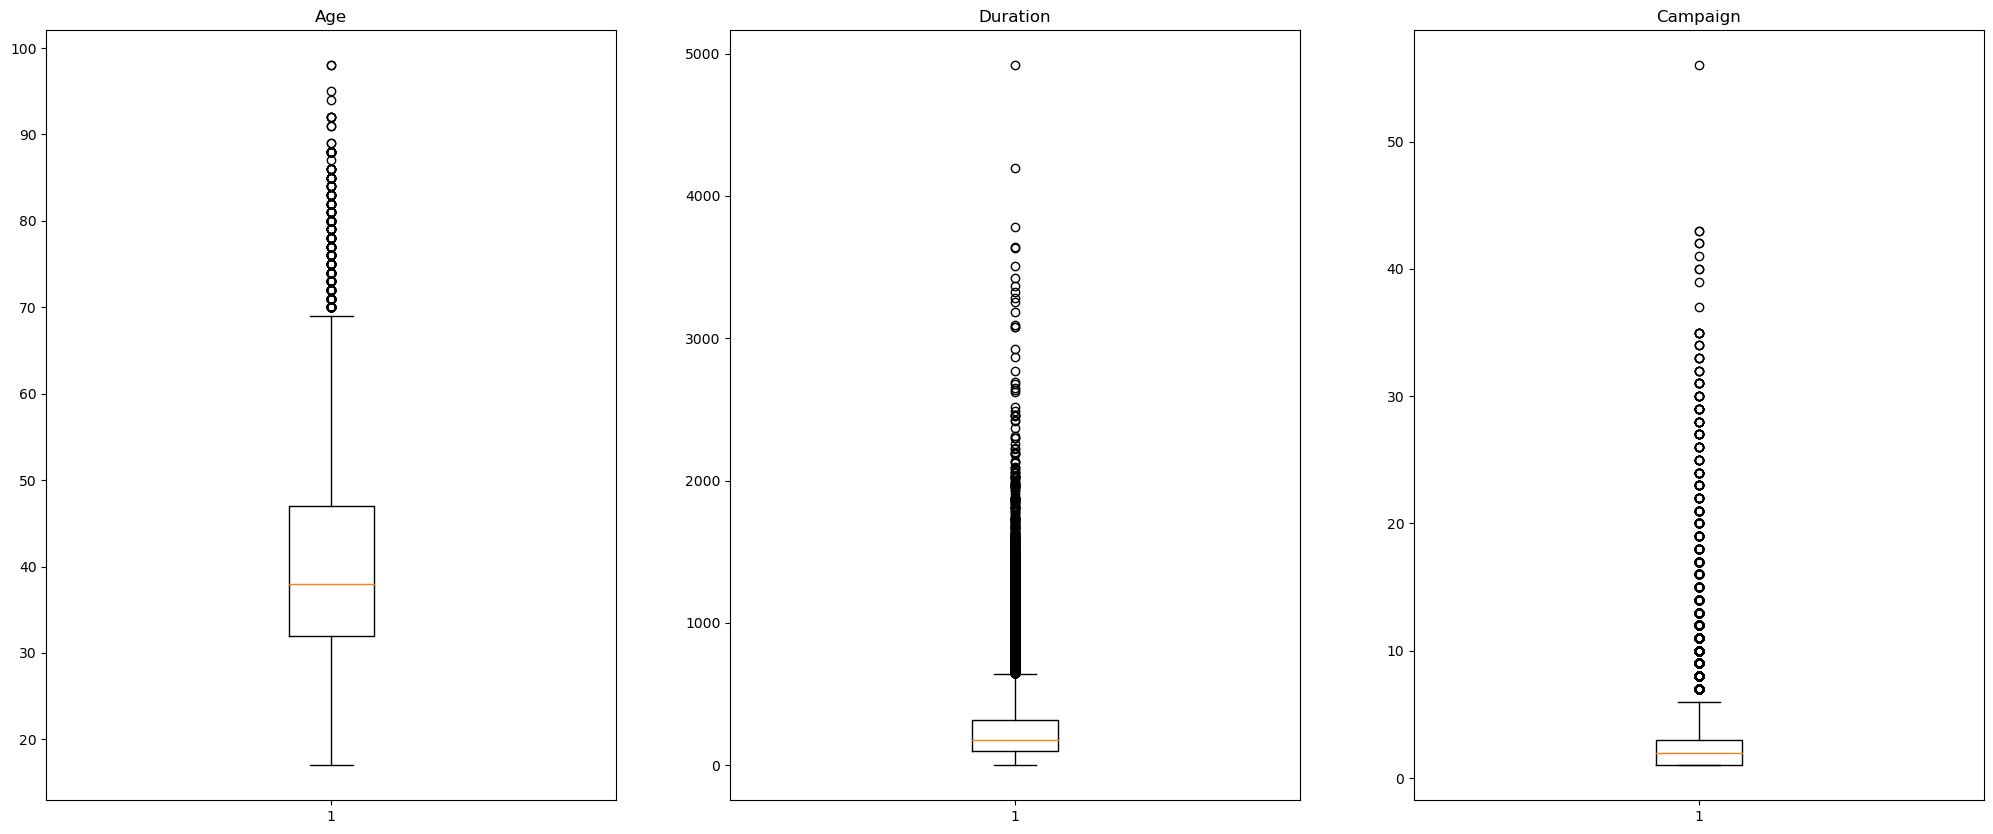

In [25]:
fig,ax=plt.subplots(1,3,figsize=(25,10))
ax[0].boxplot(veri2["age"])
ax[0].set_title("Age")
ax[1].boxplot(veri2["duration"])
ax[1].set_title("Duration")
ax[2].boxplot(veri2["campaign"])
ax[2].set_title("Campaign")
plt.show()

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [27]:
df=veri.select_dtypes(include=["int","float"])

clf=LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_
# En kotu 20 gözlemin skoru:
np.sort(df_scores)[0:100]


array([-4.25013413, -3.59436279, -3.44969504, -3.4467797 , -3.35630805,
       -3.19977575, -3.17785171, -3.09937022, -3.07387012, -3.01430352,
       -2.98525919, -2.98045847, -2.92316235, -2.8615712 , -2.85557036,
       -2.77423943, -2.73872413, -2.73414707, -2.7247738 , -2.71443077,
       -2.69899947, -2.67297036, -2.6727939 , -2.66834936, -2.65705604,
       -2.62550577, -2.62396889, -2.60796262, -2.57385114, -2.56519978,
       -2.54374863, -2.53910352, -2.53501555, -2.53364771, -2.52461183,
       -2.52143048, -2.51811249, -2.51416588, -2.49997581, -2.49993866,
       -2.47630085, -2.47417585, -2.47288617, -2.47017517, -2.46132335,
       -2.45723884, -2.45272563, -2.44080338, -2.43849513, -2.42630634,
       -2.42233245, -2.42019224, -2.42002507, -2.40521864, -2.40232156,
       -2.39873656, -2.394867  , -2.38837001, -2.38509787, -2.36562895,
       -2.35939923, -2.35256397, -2.3467166 , -2.3458316 , -2.33973858,
       -2.33190404, -2.32664135, -2.32501042, -2.32404595, -2.32

<Figure size 3000x4000 with 0 Axes>

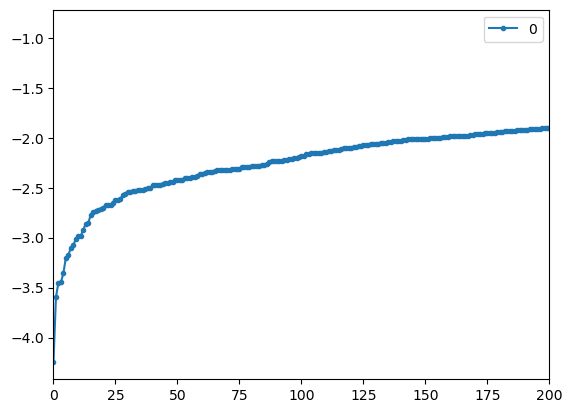

In [28]:
# grafik ile incelenmesi:
plt.figure(figsize=(30,40))
scores=pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,200],style=".-")
plt.show()

In [29]:
print(np.median(np.sort(df_scores)))
print(np.sort(df_scores).mean())
print(np.quantile(np.sort(df_scores),0.75))
print(np.quantile(np.sort(df_scores),0.25))

-1.0139900739680645
-1.0612501885978614
-0.9946966415990435
-1.065778451975679


In [32]:
np.sort(df_scores)[156] # 2'nin üstünde kalanları aykırı değer olarak belirleyelim.

-1.9990507569009242

In [33]:
th=np.sort(df_scores)[156] # eşik değeri.
veri2[df_scores<th] # Aykırı değerler

,job,marital,education,default,housing,contact,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,duration,campaign,y
2182,4,1,6,0,0,1,1,26,0,1,8,18,16,287,8,58,236,10,no
3218,1,1,2,0,0,1,2,26,0,1,8,18,16,290,8,39,651,23,yes
3412,0,0,3,0,2,1,2,26,0,1,8,18,16,290,8,32,241,23,no
3513,7,2,3,0,2,1,2,26,0,1,8,18,16,290,8,31,543,12,no
3531,1,0,1,0,2,1,0,26,0,1,8,18,16,289,8,31,597,17,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40438,5,1,7,0,0,0,3,3,1,2,4,19,14,142,1,92,1064,1,yes
40472,5,1,6,0,2,0,2,6,3,2,4,19,14,139,1,76,504,2,yes
40542,5,1,5,0,0,0,4,26,1,0,5,21,15,129,0,72,1,1,no
40626,5,1,0,0,0,0,3,3,2,2,5,21,15,124,0,85,728,1,yes


In [34]:
len(veri2[df_scores<th])/len(veri2) # veri setinin %'de kaçını oluşturuyor bakalım'

0.0037886147270254516

In [35]:
# Çok ufak bir kısım aykırı değerleri veri setinden atalım:
veri2=veri2[df_scores>th].reset_index().drop(columns="index")
veri2.head()


,job,marital,education,default,housing,contact,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,duration,campaign,y
0,3,1,0,0,0,1,1,26,0,1,8,18,16,287,8,56,261,1,no
1,7,1,3,1,0,1,1,26,0,1,8,18,16,287,8,57,149,1,no
2,7,1,3,0,2,1,1,26,0,1,8,18,16,287,8,37,226,1,no
3,0,1,1,0,0,1,1,26,0,1,8,18,16,287,8,40,151,1,no
4,7,1,3,0,0,1,1,26,0,1,8,18,16,287,8,56,307,1,no


## Varyans Yöntemine Göre Öznitelik Seçimi:

Düşük varyanslı değişkenleri çıkartalım:

In [36]:
X=veri2.drop(columns=["y"],axis=1)
y=veri2["y"]

In [37]:
# Ordinal encoder ile kategorik değişkenleri dönüştürme:
#from sklearn.preprocessing import OrdinalEncoder
#ord_enc = OrdinalEncoder()
#X[X.select_dtypes(include="object").columns]=ord_enc.fit_transform(X[X.select_dtypes(include="object").columns])
#X.head()

In [39]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.25) #%75 veya daha fazla benzer olan özniteliklere bakalım
var_thr.fit(X)

var_thr.get_support()

array([ True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [40]:
atilacaklar = [c for c in X.columns if c not in X.columns[var_thr.get_support()]]

for oznitelikler in atilacaklar:
    print(oznitelikler)

default
contact
previous
poutcome


In [41]:
X=X.drop(oznitelikler,axis=1)
X

,job,marital,education,default,housing,contact,day_of_week,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,duration,campaign
0,3,1,0,0,0,1,1,26,0,8,18,16,287,8,56,261,1
1,7,1,3,1,0,1,1,26,0,8,18,16,287,8,57,149,1
2,7,1,3,0,2,1,1,26,0,8,18,16,287,8,37,226,1
3,0,1,1,0,0,1,1,26,0,8,18,16,287,8,40,151,1
4,7,1,3,0,0,1,1,26,0,8,18,16,287,8,56,307,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41014,5,1,5,0,2,0,0,26,0,5,25,0,171,0,73,334,1
41015,1,1,5,0,0,0,0,26,0,5,25,0,171,0,46,383,1
41016,5,1,6,0,2,0,0,26,0,5,25,0,171,0,56,189,2
41017,9,1,5,0,0,0,0,26,0,5,25,0,171,0,44,442,1


Düşük varyansa sahip öznitelikleri veri setinden attık.

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41019 entries, 0 to 41018
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   job             41019 non-null  int32
 1   marital         41019 non-null  int32
 2   education       41019 non-null  int32
 3   default         41019 non-null  int32
 4   housing         41019 non-null  int32
 5   contact         41019 non-null  int32
 6   day_of_week     41019 non-null  int32
 7   pdays           41019 non-null  int32
 8   previous        41019 non-null  int32
 9   emp.var.rate    41019 non-null  int32
 10  cons.price.idx  41019 non-null  int32
 11  cons.conf.idx   41019 non-null  int32
 12  euribor3m       41019 non-null  int32
 13  nr.employed     41019 non-null  int32
 14  age             41019 non-null  int64
 15  duration        41019 non-null  int64
 16  campaign        41019 non-null  int64
dtypes: int32(14), int64(3)
memory usage: 3.1 MB


In [43]:
y=[0 if kod == "no" else 1 for kod in y]


# Sınıflandırma Modelleri Oluşturma:

In [44]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,ConfusionMatrixDisplay

In [45]:
sc=MinMaxScaler()
X=sc.fit_transform(X)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# PCA dönüşümü: Bileşen indirgeme

In [47]:
#pca=PCA(n_components=15)

#X_train2=pca.fit_transform(X_train)
#X_test2=pca.transform(X_test)

#print(X_train.shape)
#print(X_train2.shape)

#print(np.cumsum(pca.explained_variance_ratio_)*100)

#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel("Bileşen Sayısı")
#plt.ylabel("Açıklanan Varyans")
#plt.show()

PCA dönüşümü sonrası veri setinindeki değişimlerin %99'unu açıklayan 15 öznitelik ile modelimizi kuracağız.

Bu dataseti için en başarılı sınıflandırma algoritmalarını seçelim:

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [12:40<00:00, 26.24s/it]


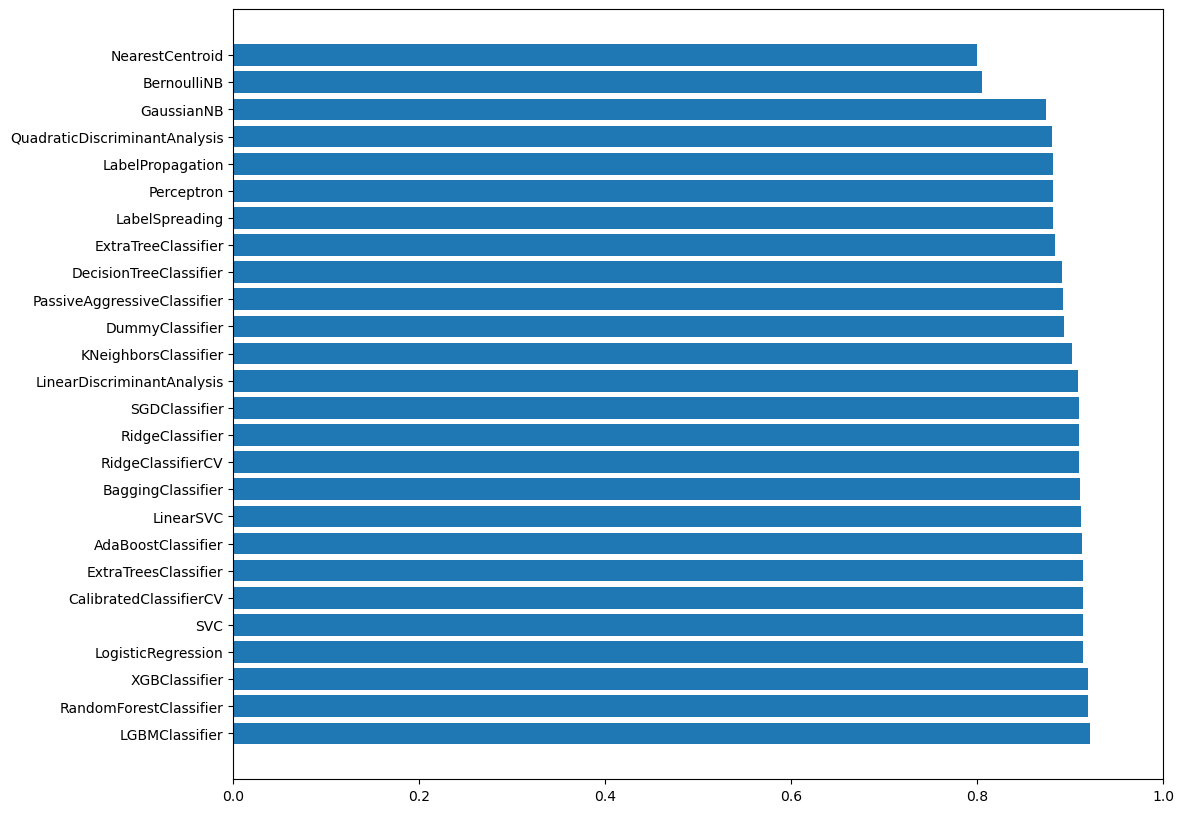

In [79]:
clf=LazyClassifier()
modeller,tahmin=clf.fit(X_train,X_test,y_train,y_test)
sıra=modeller.sort_values(by="Accuracy",ascending=False)

plt.figure(figsize=(12,10))
plt.barh(sıra.index,sıra["Accuracy"]) # ön eğleme için görüş verir...
plt.xlim([0,1])
plt.show()

En yüksek doğruluğu veren makine öğrenmesi algoritması LGBMClassifier'dir. Hiper parametre optimizasyonu yaparak vadeli mevduata abone olunup olunmama durumunu tahmin eden modeli oluşturalım:

In [48]:
from lightgbm import LGBMClassifier

In [49]:
modellgbm=LGBMClassifier()
modellgbm.fit(X_train,y_train)
tahmin=modellgbm.predict(X_test)

In [50]:
acs=accuracy_score(y_test,tahmin)
print(acs*100) # Model doğruluğu

92.15017064846417


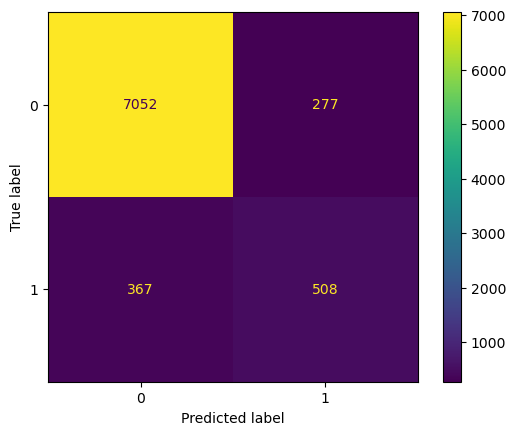

In [51]:
cm = confusion_matrix(y_test, tahmin)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
parametreler={"learning_rate":[0.001,0.01,0.1],
"n_estimators":[200,500,700,1000],
"max_depth":[4,7,10,15],
"subsample":[0.4,0.6,0.8,1.0]}

grid=GridSearchCV(modellgbm,param_grid=parametreler,cv=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.4}


In [57]:
modellgbm2=LGBMClassifier(learning_rate=0.01,max_depth=10,n_estimators=400,subsample=0.3)
modellgbm2.fit(X_train,y_train)
tahmin2=modellgbm2.predict(X_test)
acs2=accuracy_score(y_test,tahmin2)
print(acs2*100) # Model doğruluğu

92.23549488054607


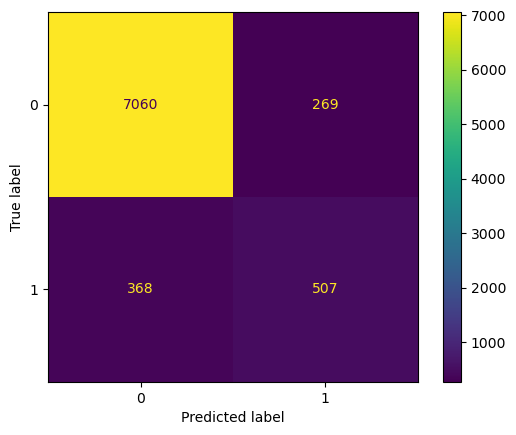

In [58]:
cm2 = confusion_matrix(y_test, tahmin2)
cm_display2 = ConfusionMatrixDisplay(cm2).plot()

Hiper parametre optimizasyonu sonucunda aralıkları cpu yetersizliğinden dolayı daha iyi tanımlamadığımda yaklaşık aynı performansı sağlayan model oluştu. Aralıklar range ile tanımlandığında daha iyi sonuçlar verecektir.

In [59]:
# kesinlik ve duyarlılık oranları:
cr=classification_report(y_test,tahmin2)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7329
           1       0.65      0.58      0.61       875

    accuracy                           0.92      8204
   macro avg       0.80      0.77      0.79      8204
weighted avg       0.92      0.92      0.92      8204



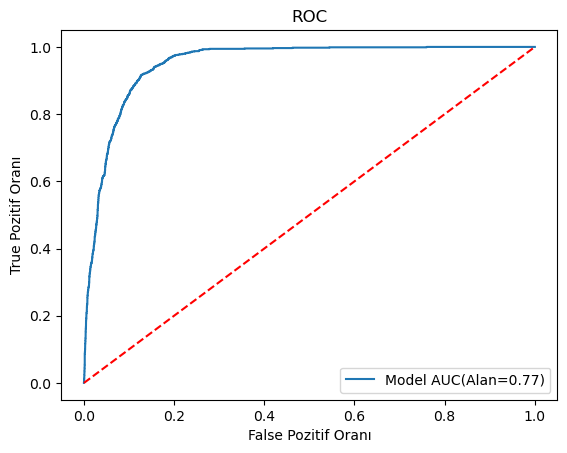

In [61]:
# Roc eğrisi
auc=roc_auc_score(y_test,tahmin2)

fpr,tpr,thresold=roc_curve(y_test,modellgbm2.predict_proba(X_test)[:,1]) #olasılık hesabı yapısı-> predict_proba
plt.plot(fpr,tpr,label="Model AUC(Alan=%0.2f)" % auc)
plt.plot([0,1],[0,1],"r--")
plt.xlabel("False Pozitif Oranı")
plt.ylabel("True Pozitif Oranı")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

AUC oranının %90 ve üzeirnde olması modelin iyi tahmin yaptığı anlamına gelir. Kurulan model bu seviyenin altında kalmaktadır fakat 0.5 oranından yüksek olmasıda rasgele tahmin yapmadığını göstermektedir.